In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#Set the index to the date column.
df1=pd.read_csv('fcc-forum-pageviews.csv',index_col='date',parse_dates=True)

In [6]:
df1

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
#Clean the data by filtering out days when the page views were in the top 
# 2.5% of the dataset or bottom 2.5% of the dataset.

In [15]:
df2=df1.loc[(df1.value>=df1.value.quantile(0.025)) & (df1.value<=df1.value.quantile(0.975))]
df2.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [9]:
df1.value.quantile(0.025)

17876.4

In [10]:
df1.value.quantile(0.975)

177613.075

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

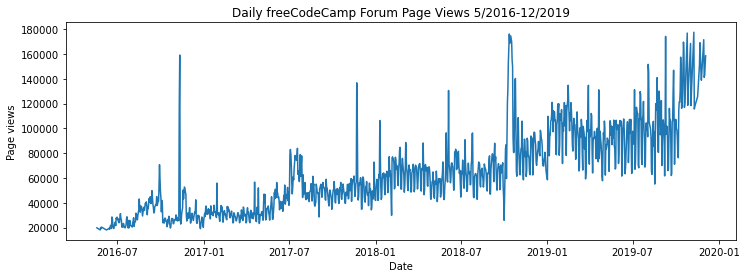

In [20]:
fig,ax=plt.subplots(figsize=(12,4))
ax=sns.lineplot(data=df2,x='date',y='value')
plt.xlabel('Date')
plt.ylabel('Page views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [21]:
#It should show average daily page views for each month grouped by year.

In [36]:
# modify data based on months
df_bar=df2.copy()
df_bar['Month']=pd.DatetimeIndex(df_bar.index).month
df_bar['Year']=pd.DatetimeIndex(df_bar.index).year
df_bar=df_bar.groupby(['Year','Month'])['value'].mean()

In [47]:
# values grouped by year
df_bar
df_bar=df_bar.unstack()
df_bar.columns=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df_bar

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


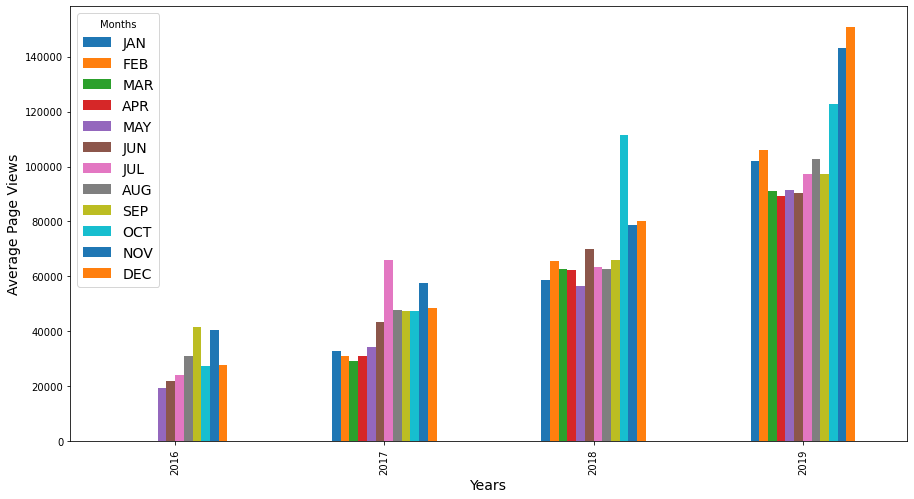

In [54]:
fig=df_bar.plot(kind='bar',figsize=(15,8)).figure
plt.xlabel('Years',fontsize=14)
plt.ylabel('Average Page Views',fontsize=14)
plt.legend(title='Months',fontsize=14)

In [69]:
#def draw_box_plot():
    # Prepare data for box plots (this part is done!)
df_box = df2.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [70]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page views')

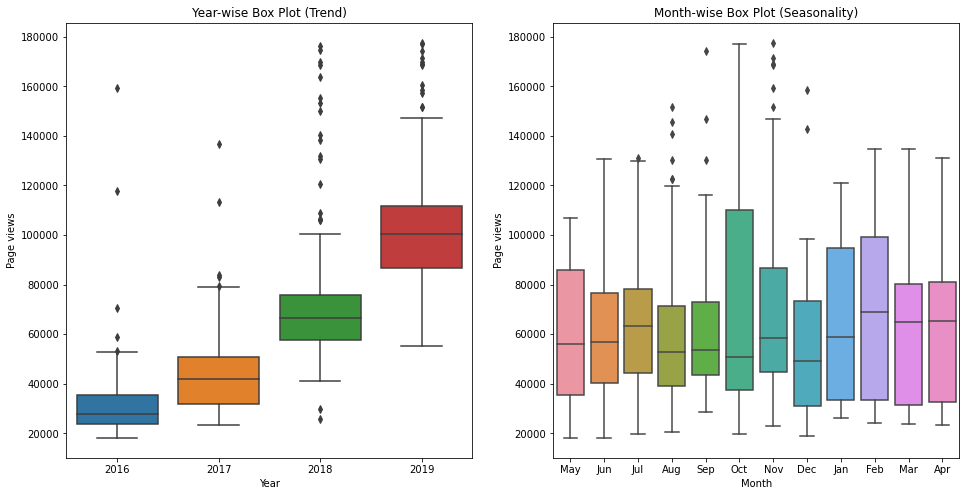

In [75]:
# draw box plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))

sns.boxplot(ax=ax1,x='year',y='value',data=df_box)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page views')

sns.boxplot(ax=ax2,x='month',y='value',data=df_box)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page views')